# 設定

In [ ]:
!pip install japanize-matplotlib

In [124]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
import japanize_matplotlib 
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import multinomial
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# 5.1

## 図5.1

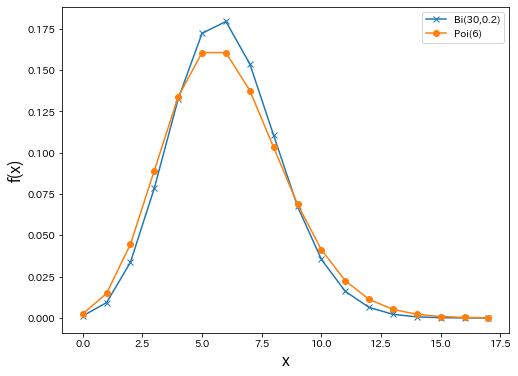

In [11]:
plt.figure(figsize=(8,6))
x = np.arange(0, 18)
plt.plot(x, binom.pmf(x, 30, 0.2), marker='x' , label='Bi(30,0.2)')
plt.plot(x, poisson.pmf(x, 6),marker='o', label='Poi(6)')
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.legend()

## 図5.2

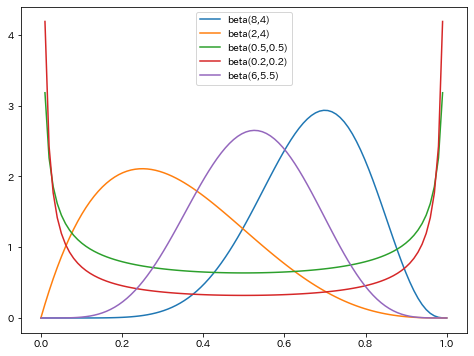

In [13]:
plt.figure(figsize=(8,6))
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, 8, 4), label='beta(8,4)')
plt.plot(x, beta.pdf(x, 2, 4), label='beta(2,4)')
plt.plot(x, beta.pdf(x, 0.5, 0.5), label='beta(0.5,0.5)')
plt.plot(x, beta.pdf(x, 0.2, 0.2), label='beta(0.2,0.2)')
plt.plot(x, beta.pdf(x, 6, 5.5), label='beta(6,5.5)')
plt.legend()

plt.show()

# 5.2

## 図5.3

In [4]:
mu = [0, 0]
cov = [[1, 0.5],[0.5, 1]]
mn = multivariate_normal.rvs(mean=mu,cov=cov,size=2000)

In [5]:
mn

array([[-1.35697586,  0.07878936],
       [ 0.3529327 ,  0.12675006],
       [-0.58781974,  0.74954797],
       ...,
       [ 0.36090953,  0.30120011],
       [-1.20634708, -0.33080223],
       [ 0.14242519,  0.2052878 ]])

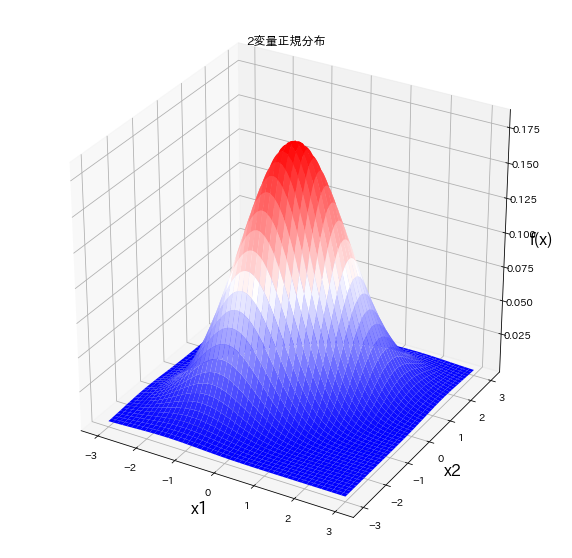

In [85]:
N = 1000
x1 = np.linspace(-3, 3, N)
x2 = np.linspace(-3, 3, N)

X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

Y_plot = multivariate_normal.pdf(x=X, mean=mu, cov=cov)
Y_plot = Y_plot.reshape(X1.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Y_plot, cmap='bwr', linewidth=0)
ax.set_xlabel('x1',fontsize=16)
ax.set_ylabel('x2',fontsize=16)
ax.set_zlabel('f(x)',fontsize=16)
ax.set_title("2変量正規分布")
fig.show()


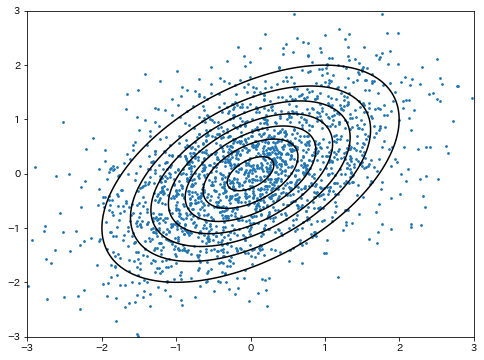

In [71]:
x=mn[:,0]
y=mn[:,1]

plt.figure(figsize=(8,6))
plt.scatter(x,y,alpha=1, s=3)
plt.contour(X1, X2, Y_plot,colors='black')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# 5.5

## 図5.6

Text(0, 0.5, 'f(x)')

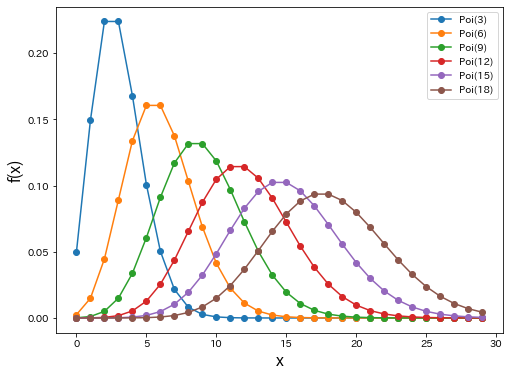

In [76]:
plt.figure(figsize=(8,6))
x=np.arange(30)
for i in range(3,19,3):
  y=poisson.pmf(x,i)
  plt.plot(x,y,marker='o',label='Poi({})'.format(i))
plt.legend()
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

## 図5.7

In [77]:
gfr = pd.read_csv('/content/gfr.txt',names=['gfr'])

$f_{\alpha}(x) = \exp\{\alpha^Ty  -\psi (\alpha) \} $

$\psi (\alpha) =∫_{\chi} \exp\{\alpha^Ty\} dx $

$y=(x,x^2,\cdots,x^7)$

In [100]:
a=[1]
b=[1,2,3]
a.append(b)

In [101]:
a

[1, [1, 2, 3]]

In [104]:
def make_poly(x, degree):
  X=[]
  for i in range(len(x)):
    x_mat = [x[i]**k for k in range(degree + 1)]
    X.append(x_mat)
  columns = ["x{}".format(i) for i in range(degree + 1)]
  return pd.DataFrame(X, columns=columns)

In [107]:
poly_X = make_poly(gfr['gfr'], degree=7)

In [116]:
poly_X.head()

,x0,x1,x2,x3,x4,x5,x6,x7
0,1,108,11664,1259712,136048896,14693280768,1586874322944,171382426877952
1,1,91,8281,753571,68574961,6240321451,567869252041,51676101935731
2,1,62,3844,238328,14776336,916132832,56800235584,3521614606208
3,1,59,3481,205379,12117361,714924299,42180533641,2488651484819
4,1,84,7056,592704,49787136,4182119424,351298031616,29509034655744


In [119]:
np.mean(poly_X)

x0    1.000000e+00
x1    5.426540e+01
x2    3.132104e+03
x3    1.933704e+05
x4    1.284052e+07
x5    9.199084e+08
x6    7.099595e+10
x7    5.864321e+12
dtype: float64

In [118]:
poly_X.iloc[1]

x0                 1
x1                91
x2              8281
x3            753571
x4          68574961
x5        6240321451
x6      567869252041
x7    51676101935731
Name: 1, dtype: int64

In [120]:
len(poly_X)

211

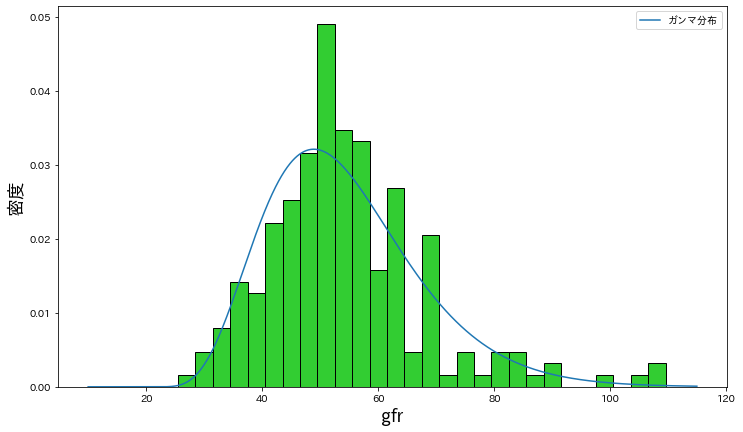

In [125]:
nu_hat, lambda_hat, sigma_hat = gamma.fit(gfr['gfr'])
n=len(gfr)

x=np.arange(10,115,0.1)

#y
yy = gamma.pdf(x, nu_hat, loc=lambda_hat, scale=sigma_hat)

fig, ax = plt.subplots(figsize=(12, 7))
ax.hist(gfr['gfr'], bins = np.arange(13.5, 112, 3), edgecolor="k", color="limegreen",density=True)
ax.set_xlabel("gfr", size=18)
ax.set_ylabel("密度", size=18)
#ax.plot(x,y, label='指数型分布族')
ax.plot(x,yy, label='ガンマ分布')
ax.legend()